In [1]:
import numpy as np
from astropy.table import Table

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

POPSYCLE SIM

In [2]:
pops = Table.read("data/research_paper/popsycle_sim.fits").to_pandas()

In [3]:
arr = []
for i in range(len(pops)):
    if (pops["rem_id_L"][i] == 103 and (pops["mass_L"][i] > 2.5 and pops["mass_L"][i] < 6)): #.5 for added padding to mass gap
        arr.append(i) #lower mass gap of bhs is between 2.5 or so and 5-7

OB110462 - Mass gap classified data

In [4]:
ob = Table.read("data/research_paper/OB110462_DW_post.fits").to_pandas() #color data
ob.head()

,logLike,t0,u0_amp,tE,log10_thetaE,piS,piE_E,piE_N,xS0_E,xS0_N,muS_E,muS_N,mL,piL,piRel,muL_E,muL_N,muRel_E,muRel_N
0,184.877683,55763.312017,-0.051724,287.263116,0.728651,0.135751,0.021247,-0.093013,0.229670,-0.213814,0.066662,1.157038,6.890218,0.646538,0.510787,-1.449263,7.793189,1.515925,-6.636151
1,189.491588,55763.143207,-0.056239,273.684662,0.363211,0.123753,0.019904,-0.110011,0.229638,-0.214271,0.122164,1.132030,2.534837,0.381767,0.258013,-0.426201,4.162822,0.548365,-3.030792
2,191.105374,55762.869349,-0.059092,280.197751,0.597241,0.117932,0.019986,-0.119649,0.230059,-0.214283,0.031534,1.162280,4.004285,0.597806,0.479873,-0.818066,6.248444,0.849601,-5.086164
3,191.884685,55764.431058,-0.042804,279.152526,0.617667,0.098635,0.025575,-0.087679,0.229609,-0.214235,0.126121,1.152938,5.574564,0.477333,0.378698,-1.393074,6.361090,1.519195,-5.208152
4,192.296255,55762.025369,-0.067009,273.444603,0.572748,0.138009,0.020906,-0.127337,0.229948,-0.214424,0.060268,1.204426,3.557838,0.620489,0.482480,-0.748844,6.132681,0.809112,-4.928255


In [5]:
ob.columns

Index(['logLike', 't0', 'u0_amp', 'tE', 'log10_thetaE', 'piS', 'piE_E',
       'piE_N', 'xS0_E', 'xS0_N', 'muS_E', 'muS_N', 'mL', 'piL', 'piRel',
       'muL_E', 'muL_N', 'muRel_E', 'muRel_N'],
      dtype='object')

combine data

In [6]:
popsCols = list(pops.columns)
obCols = list(ob.columns)
len(pops) + len(ob)

23139

In [7]:
wanted_ob = ["t0","u0_amp","tE","log10_thetaE","piE_E","muS_E","mL","piRel","muL_E","muRel_E"]
wanted_pops = ["t0","u0","t_E","theta_E","pi_E","mu_b_S","mass_L","pi_rel","mu_b_L","mu_rel"]

ob_to_pops = {"t0":"t0", "u0_amp":"u0","tE":"t_E","log10_thetaE":"theta_E","piE_E":"pi_E","muS_E":"mu_b_S","mL":"mass_L","piRel":"pi_rel","muL_E":"mu_b_L","muRel_E":"mu_rel"}


def gk(val,d=ob_to_pops):
    keys = [k for k, v in d.items() if v == val]
    if keys:
        return keys[0]
    return None


dfWhole = pd.DataFrame()
for j in wanted_ob:
    for k in range(len(ob[j])):
        dfWhole.at[k,j] = ob[j][k] #0,x 

dict = {"id":[]}

for j in wanted_pops:
    jVal = gk(j)
    dict[jVal] = pops[j]

for i in range(len(pops["rem_id_L"])):
    dict["id"].append(pops["rem_id_L"][i])

dfTotal = pd.concat([dfWhole,pd.DataFrame(dict)])


Current class labels

- 0 = star
- 101 = white dwarf , 
- 102 = neutron star
- 103 = black hole

Changed/altered class Labels

- -1 = mass gap bh (current nan)
- 0 = star
- 101 = white dwarf
- 102 = neutron star
- 103 = regular bh

In [19]:
massGP = [val for val in dfTotal["mL"] if val >= 2.5 and val <= 5]
len(massGP)

3285

In [39]:
idToAlt = {0:0, 101:1, 102:2, 103:3}
dfTotal = dfTotal.fillna(-1)   
dfTotal.isna().sum()

t0              0
u0_amp          0
tE              0
log10_thetaE    0
piE_E           0
muS_E           0
mL              0
piRel           0
muL_E           0
muRel_E         0
id              0
dtype: int64

Preprocess data

In [41]:
dfTotal.dtypes

t0              float64
u0_amp          float64
tE              float64
log10_thetaE    float64
piE_E           float64
muS_E           float64
mL              float64
piRel           float64
muL_E           float64
muRel_E         float64
id              float64
dtype: object

In [49]:
print(dfTotal.skew())
print("_________________________")
print(" ")
print(dfTotal.kurtosis())

t0              1.983625
u0_amp          0.401305
tE              1.887421
log10_thetaE    4.519006
piE_E           2.087928
muS_E          -0.109301
mL              3.042050
piRel           3.724419
muL_E          -0.087966
muRel_E         1.331930
id              2.478820
dtype: float64
_________________________
 
t0               1.936378
u0_amp           2.476196
tE               1.877551
log10_thetaE    51.244954
piE_E           30.167515
muS_E            1.872167
mL              13.631273
piRel           59.298826
muL_E            2.442283
muRel_E          7.202166
id               4.146553
dtype: float64


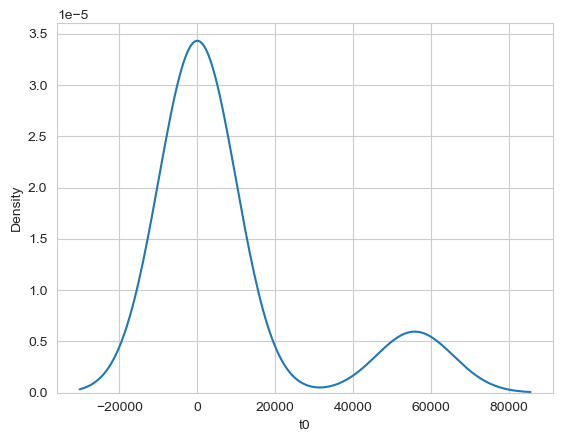

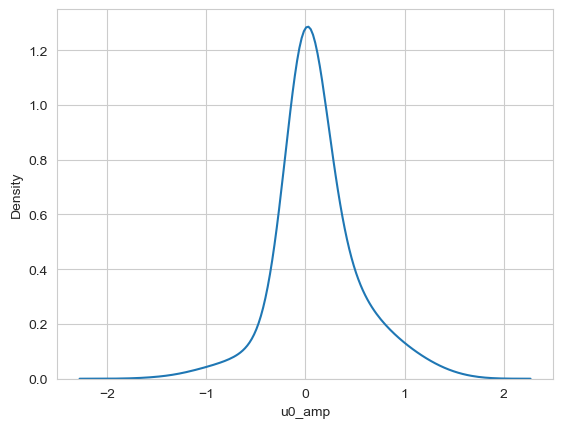

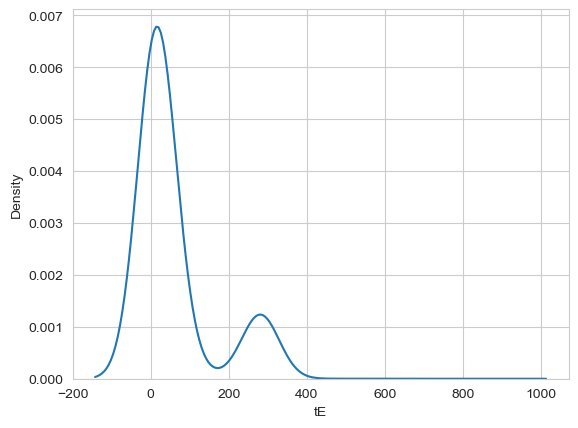

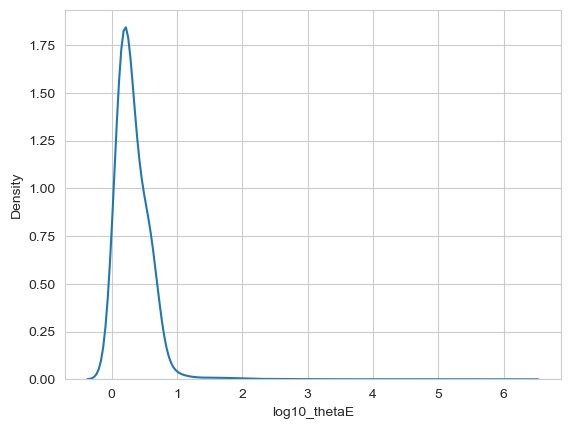

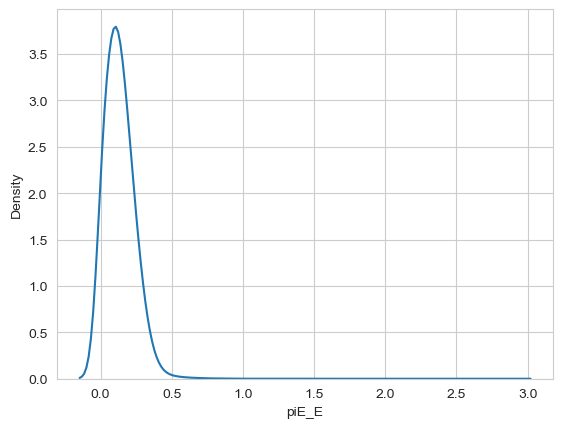

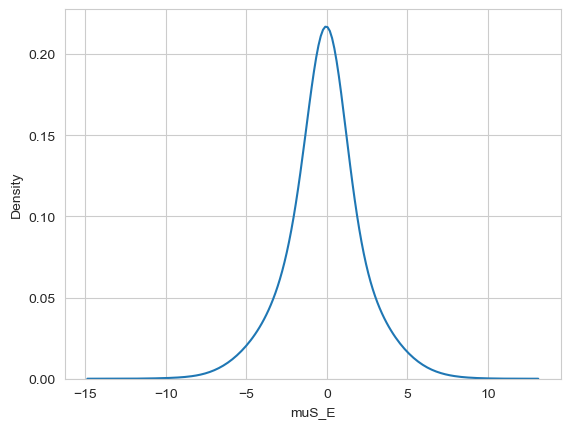

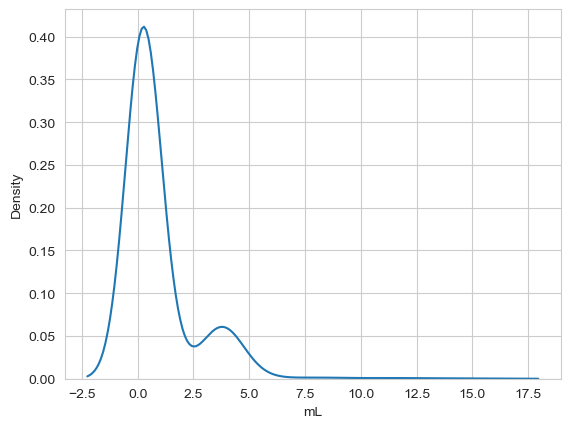

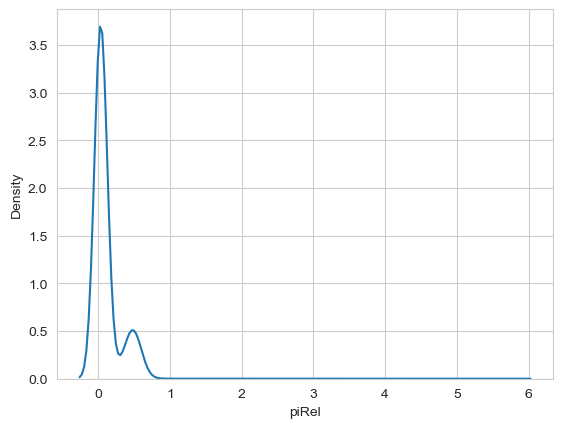

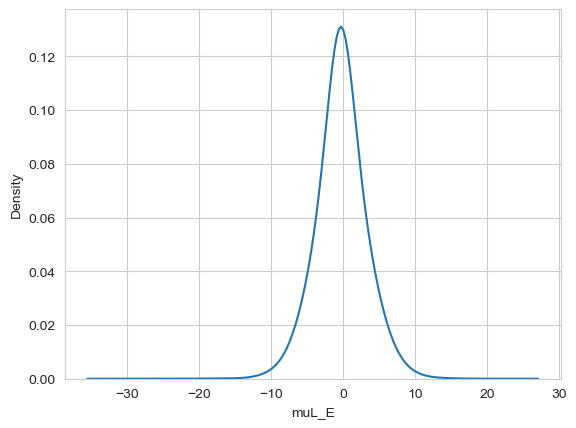

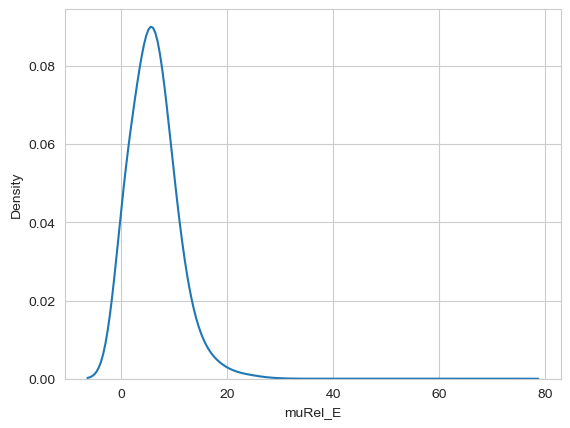

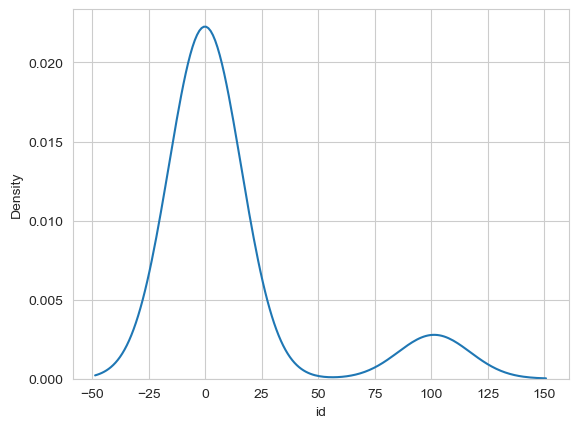

In [58]:
for col in list(dfTotal.columns):
    plt.figure()
    sns.kdeplot(dfTotal[col],bw_method=0.5)
    
    